<a href="https://colab.research.google.com/github/anaC-Fernandes/ProjetoDados/blob/main/Notebooks/Dataset_Crise.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**Tema:** 📉 Crise
### **Pergunta:** 10. Como a taxa de desemprego foi afetada durante a pandemia ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore') # Warnings serão ignorados para não atrapalharem a visualização do notebook

## **Tabela BrStats**

Lendo o arquivo **BrStats** e definindo ';' como separador.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anaC-Fernandes/ProjetoDados/b24ccf93b2443ef98350eb29875371fe91210548/BrStats.csv', sep = ';', low_memory= False)

## **Tratamento dos Dados**

In [4]:
# Tratamento da formatação dos dados
for coluna in df.columns:
    df[coluna] = df[coluna].astype(str)  # Garante que é string
    df[coluna] = df[coluna].str.replace('.', '', regex=False)  # Remove separador de milhar
    df[coluna] = df[coluna].str.replace(',', '.', regex=False)  # Converte decimal
    df[coluna] = pd.to_numeric(df[coluna], errors='ignore')  # Converte para número, ignorando erros

for coluna in df.columns:
  df[coluna] = df[coluna].astype(str)  # Garante que é string
  df[coluna] = df[coluna].str.replace('nan', '0', regex=False)  # Converte decimal

# Tratamento de tipo

df['Ano'] = df['Ano'].astype(int)
df['CDMunicipio'] = df['CDMunicipio'].astype(str)
df['Populacao'] = df['Populacao'].astype(int)
df['PessoalOcupado'] = df['PessoalOcupado'].astype(int)
df['PessoalAssalariado'] = df['PessoalAssalariado'].astype(int)
df['VrSalarios'] = df['VrSalarios'].astype(int)
df['PIB'] = df['PIB'].astype(int)
df['QtEmpresas'] = df['QtEmpresas'].astype(int)
df['AreaPlantada_h'] = df['AreaPlantada_h'].astype(int)
df['AreaColhida_h'] = df['AreaColhida_h'].astype(int)
df['VlProducaoAgricola'] = df['VlProducaoAgricola'].astype(int)
df['VlProducaoPecuaria'] = df['VlProducaoPecuaria'].astype(int)
df['Area'] = df['Area'].astype(float)
df['Importacoes_US$'] = df['Importacoes_US$'].astype(float)
df['Exportacoes_US$'] = df['Exportacoes_US$'].astype(float)
df['Receitas_R$'] = df['Receitas_R$'].astype(float)
df['Transferencias_correntes_R$'] = df['Transferencias_correntes_R$'].astype(float)
df['Transferencias_capital_R$'] = df['Transferencias_capital_R$'].astype(float)
df['NrNascimentos'] = df['NrNascimentos'].astype(int)
df['NrObitosInfantis'] = df['NrObitosInfantis'].astype(int)
df['povoamento'] = df['povoamento'].astype(float)

A coluna "PessoalOcupado" se refere a qualquer pessoa que esteja trabalhando, seja por conta própria, como sócio de uma empresa, ou como empregado, enquanto a coluna "PessoalAssalariado" contém o número de pessoas que têm um contrato de trabalho com um empregador e recebem um salário como remuneração por seus serviços. Para calcular o número de trabalhadores informais então, basta subtrair uma coluna por outra.

In [5]:
df['PessoalInformal'] = abs(df['PessoalOcupado'] - df['PessoalAssalariado'])

df['TaxaAssalariado'] = np.where(
    df['PessoalAssalariado'] != 0,  # Condição para evitar divisão por zero
    df['PessoalAssalariado'] / df['Populacao'],  # Cálculo se a condição for verdadeira
    np.nan  # Valor se for divisão por zero
)

df['TaxaInformal'] = np.where(
    df['PessoalInformal'] != 0,  # Condição para evitar divisão por zero
    df['PessoalInformal'] / df['Populacao'],  # Cálculo se a condição for verdadeira
    np.nan  # Valor se for divisão por zero
)

Aqui eu tiro as colunas que não serão usadas nas analises.

In [6]:
pd.set_option('display.max_info_columns', df.shape[1] + 1)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.precision', 2)


df = df.drop(columns=['CDMunicipio'])
df = df.drop(columns=['AreaPlantada_h'])
df = df.drop(columns=['AreaColhida_h'])
df = df.drop(columns=['VlProducaoAgricola'])
df = df.drop(columns=['VlProducaoPecuaria'])
df = df.drop(columns=['Area'])
df = df.drop(columns=['NrNascimentos'])
df = df.drop(columns=['povoamento'])
df = df.drop(columns=['NrObitosInfantis'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33420 entries, 0 to 33419
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ano                          33420 non-null  int64  
 1   Populacao                    33420 non-null  int64  
 2   PessoalOcupado               33420 non-null  int64  
 3   PessoalAssalariado           33420 non-null  int64  
 4   VrSalarios                   33420 non-null  int64  
 5   PIB                          33420 non-null  int64  
 6   QtEmpresas                   33420 non-null  int64  
 7   Importacoes_US$              33420 non-null  float64
 8   Exportacoes_US$              33420 non-null  float64
 9   Receitas_R$                  33420 non-null  float64
 10  Transferencias_correntes_R$  33420 non-null  float64
 11  Transferencias_capital_R$    33420 non-null  float64
 12  UF                           33420 non-null  object 
 13  Municipio       

Afim de facilitar algumas consultas, eu divido o dataset em 5, um pra cada região do Brasil

In [7]:
df_norte = df[df['Regiao'] == 'Norte']
df_nordeste = df[df['Regiao'] == 'Nordeste']
df_sul = df[df['Regiao'] == 'Sul']
df_sudeste = df[df['Regiao'] == 'Sudeste']
df_centro_oeste = df[df['Regiao'] == 'Centro-Oeste']


## **Dados do desesemprego**

Para iniciar o estudo de como a pandemia de covid-21 afetou o desemprego no Brasil, vamos começar traçando dois gráficos, um vai mostrar o a relação entre a taxa de pessoas assalariadas por municipio, enquanto o outro apresenta a taxa de trabalhadores informais por municipio

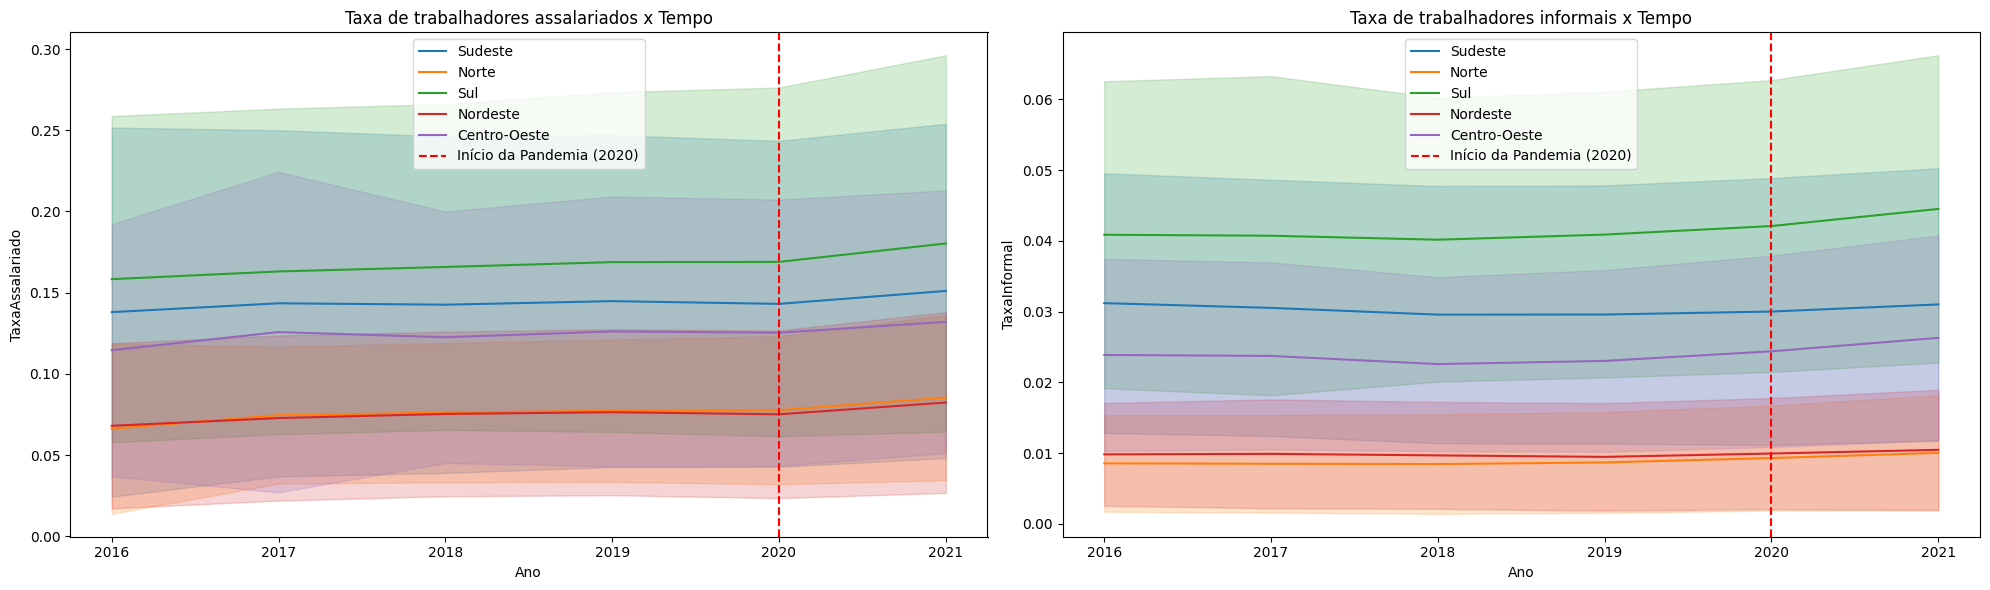

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6)) 


sns.lineplot(data=df, x='Ano', y='TaxaAssalariado', hue='Regiao', errorbar= 'sd', ax=ax1)
ax1.axvline(x=2020, color='red', linestyle='--', label='Início da Pandemia (2020)')
ax1.set_title('Taxa de trabalhadores assalariados x Tempo')
ax1.legend()

sns.lineplot(data=df, x='Ano', y='TaxaInformal', hue='Regiao', errorbar='sd', ax=ax2)
ax2.axvline(x=2020, color='red', linestyle='--', label='Início da Pandemia (2020)')
ax2.set_title('Taxa de trabalhadores informais x Tempo')
ax2.legend()

plt.tight_layout()
plt.show()


A principio, podemos notar um leve aumento do desemprego durante o inicio da pandemia. Um problema no entanto, é que nós temos um desvio padrão muito grande dos dados, o devio padrão é representado por essa "mancha" ao redor de cada linha. Um desvio padrão muito grande pode indicar que nossos dados estão muito dispersos, e/ou há muitos outliers no dataset...

Um fator que pode estar contribuindo com essa dispersão é que os dados podem estar errados, note o exemplo do municipio de Campina do Monte Alegre, é um municipio no Sudeste, com cerca de seis mil habitantes em média, porém no dataset, cujo os dados foram retiradas do IBGE, menos de mil dessas pessoas trabalham. 

In [9]:
df[df['Municipio'] == 'Campina do Monte Alegre']

,Ano,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,Importacoes_US$,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,UF,Municipio,Regiao,PessoalInformal,TaxaAssalariado,TaxaInformal
0,2016,5932,854,537,13692,111190,2520,40.00,0.00,25511889.22,18911068.40,1665392.54,SP,Campina do Monte Alegre,Sudeste,317,0.09,0.05
2044,2017,5963,818,533,14264,109892,2320,4.00,0.00,25213738.74,19836282.57,1039182.87,SP,Campina do Monte Alegre,Sudeste,285,0.09,0.05
6297,2019,6024,921,688,25040,118264,1990,9575.00,0.00,27421912.30,23607909.34,175000.00,SP,Campina do Monte Alegre,Sudeste,233,0.11,0.04
12185,2021,6088,760,571,18713,0,1650,19954487.00,367941.00,0.00,27277489.06,1436356.32,SP,Campina do Monte Alegre,Sudeste,189,0.09,0.03
14729,2020,6057,753,531,15928,137149,2030,0.00,11215.00,0.00,23635547.68,2209655.20,SP,Campina do Monte Alegre,Sudeste,222,0.09,0.04
22386,2018,5991,865,647,22300,106385,1740,0.00,0.00,25307879.18,20986013.68,354980.00,SP,Campina do Monte Alegre,Sudeste,218,0.11,0.04


Note também, o crescimento espôntaneo nas exportações e importações do municipio 2021

Com os dados que temos até o momento, não é possível traçar um conclusão sobre entre o desemprego e a pandemia. Por isso, vamos analisar região por região, e dessa vez usaremos gráficos boxplot que são mais adequados para dados com um desvio padrão muito grande

### **Região Norte**

Pode se observar um aumento na informalidade entre 2020 e 2021, não é possível por enquanto atribuir isso há pandemia, até porque ela também cresceu de 2019 para 2020.
Temos muitos outliers no gráfico, lembrando que há 450 municipios na Região Norte

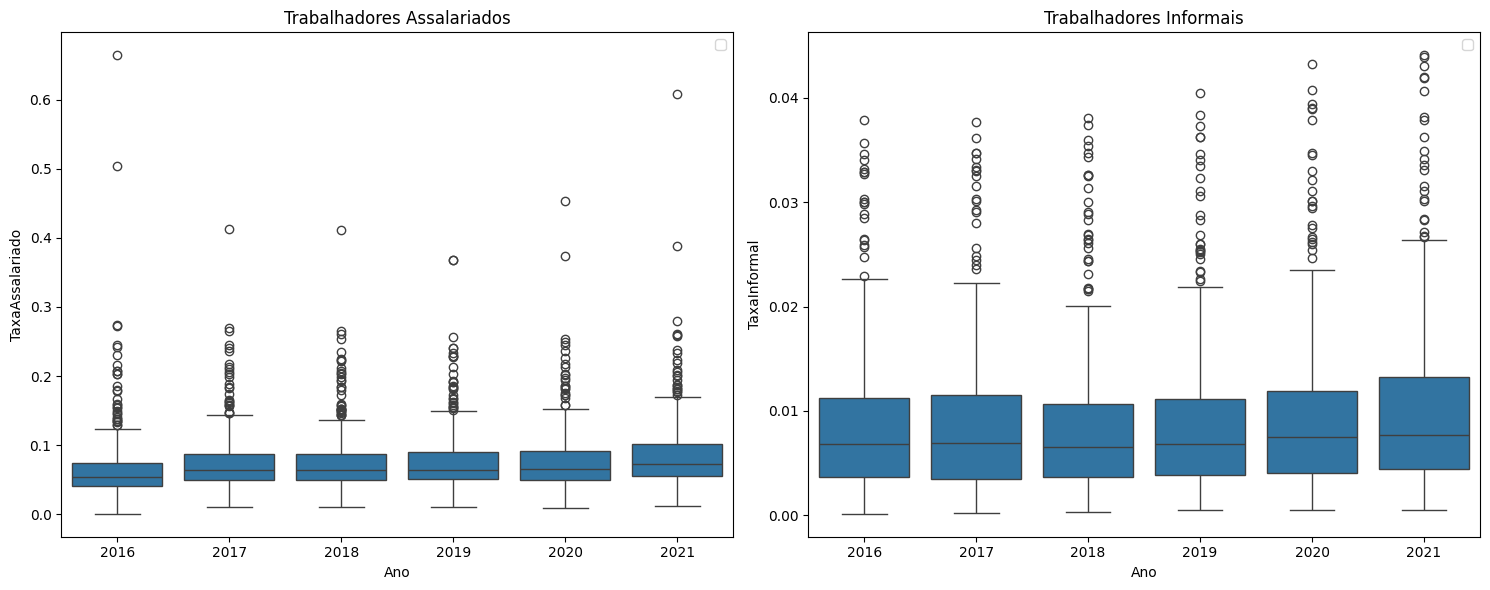

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) 

sns.boxplot(data =df_norte, x = 'Ano', y = 'TaxaAssalariado', ax = ax1)
ax1.set_title("Trabalhadores Assalariados")
ax1.legend()

sns.boxplot(data =df_norte, x = 'Ano', y = 'TaxaInformal', ax = ax2)
ax2.set_title("Trabalhadores Informais")
ax2.legend()

plt.tight_layout()
plt.show()

### **Região Nordeste**

Algo interessante de se perceber, além da quantidade elevada de outliers, é que em 2016 temos um outlier com uma taxa de trabalhadores assalariados maior que 1...

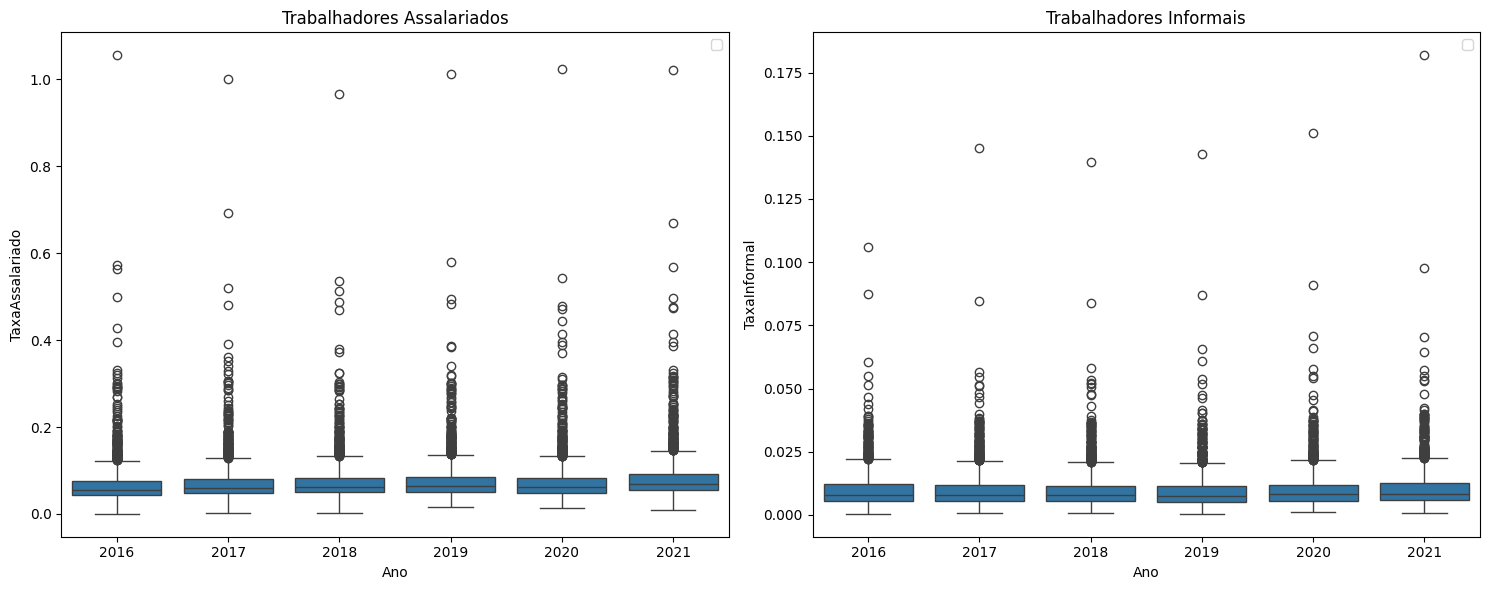

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) 

sns.boxplot(data =df_nordeste, x = 'Ano', y = 'TaxaAssalariado', ax = ax1)
ax1.set_title("Trabalhadores Assalariados")
ax1.legend()

sns.boxplot(data =df_nordeste, x = 'Ano', y = 'TaxaInformal', ax = ax2)
ax2.set_title("Trabalhadores Informais")
ax2.legend()

plt.tight_layout()
plt.show()

Investigando mais a fundo esse outlier é o municipio de Eusébio, que segundo os dados retirados do IBGE tem mais habitantes assalariados do que habitantes na cidade durante o intervalo de 2016 até 2021

In [12]:
df_nordeste[df_nordeste['TaxaAssalariado'] > 1]

,Ano,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,Importacoes_US$,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,UF,Municipio,Regiao,PessoalInformal,TaxaAssalariado,TaxaInformal
1543,2016,51913,59316,54773,1512767,3079857,2387,46255237.00,25173209.00,297334300.87,164380361.15,4989626.36,CE,Eusébio,Nordeste,4543,1.06,0.09
3510,2017,52667,57153,52695,1443458,2956704,2352,32427115.00,37897984.00,302222381.61,172100394.92,3657546.23,CE,Eusébio,Nordeste,4458,1.00,0.08
7805,2019,53618,58982,54314,1646802,3188297,2824,38566199.00,38360933.00,359149310.29,223455934.04,2157567.88,CE,Eusébio,Nordeste,4668,1.01,0.09
10011,2020,54337,60522,55570,1801558,3184375,2967,36386122.00,39712628.00,0.00,236601261.85,3804931.62,CE,Eusébio,Nordeste,4952,1.02,0.09
12357,2021,55035,61533,56151,1941123,0,3174,37636040.00,75522368.00,0.00,277537412.37,5116892.00,CE,Eusébio,Nordeste,5382,1.02,0.10


### **Região Centro Oeste**

Mais uma vez podemos observar um outlier com uma taxa de trabalhadores assalariados superior a 1,4

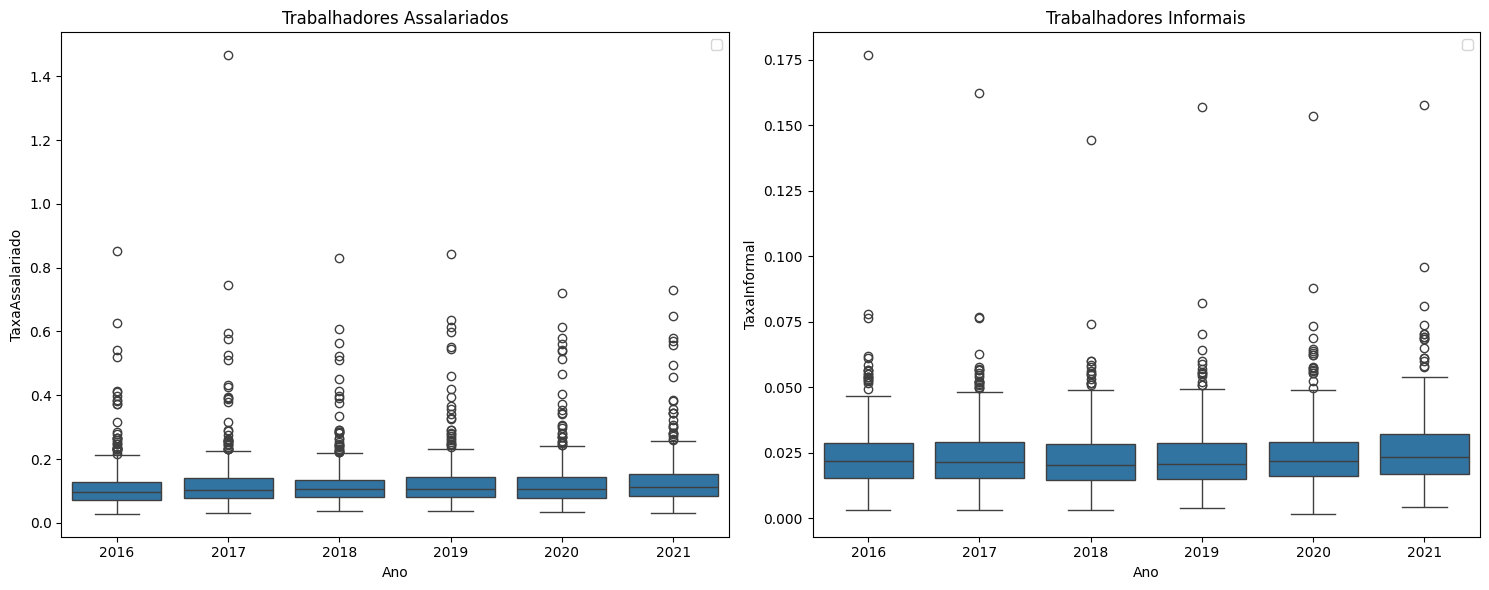

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) 

sns.boxplot(data =df_centro_oeste, x = 'Ano', y = 'TaxaAssalariado', ax = ax1)
ax1.set_title("Trabalhadores Assalariados")
ax1.legend()

sns.boxplot(data =df_centro_oeste, x = 'Ano', y = 'TaxaInformal', ax = ax2)
ax2.set_title("Trabalhadores Informais")
ax2.legend()

plt.tight_layout()
plt.show()

Esse outlier é o municipio de Perolândia

In [14]:
df_centro_oeste[df_centro_oeste['TaxaAssalariado'] > 1]

,Ano,Populacao,PessoalOcupado,PessoalAssalariado,VrSalarios,PIB,QtEmpresas,Importacoes_US$,Exportacoes_US$,Receitas_R$,Transferencias_correntes_R$,Transferencias_capital_R$,UF,Municipio,Regiao,PessoalInformal,TaxaAssalariado,TaxaInformal
22233,2017,3135,4624,4595,191082,357041,460,0.00,0.00,29727960.65,24118665.44,273443.44,GO,Perolândia,Centro-Oeste,29,1.47,0.01


### **Região Sudeste**

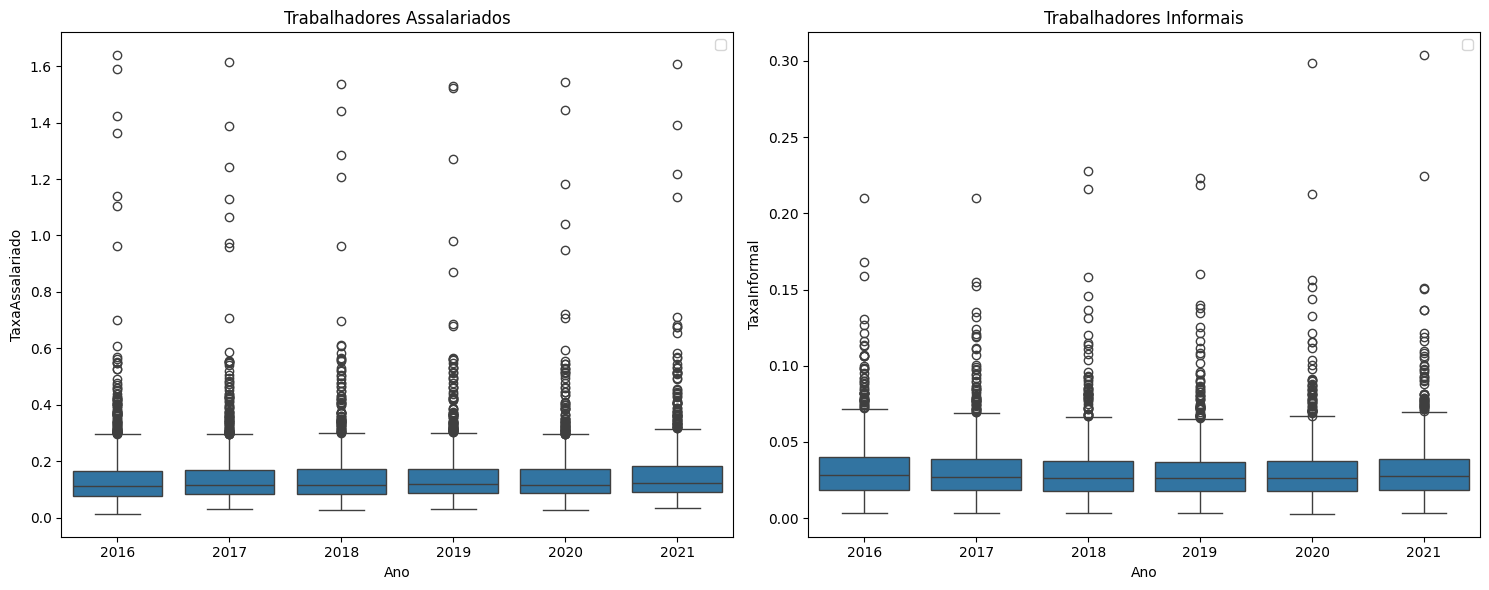

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) 

sns.boxplot(data =df_sudeste, x = 'Ano', y = 'TaxaAssalariado', ax = ax1)
ax1.set_title("Trabalhadores Assalariados")
ax1.legend()

sns.boxplot(data =df_sudeste, x = 'Ano', y = 'TaxaInformal', ax = ax2)
ax2.set_title("Trabalhadores Informais")
ax2.legend()

plt.tight_layout()
plt.show()

### **Região Sul**

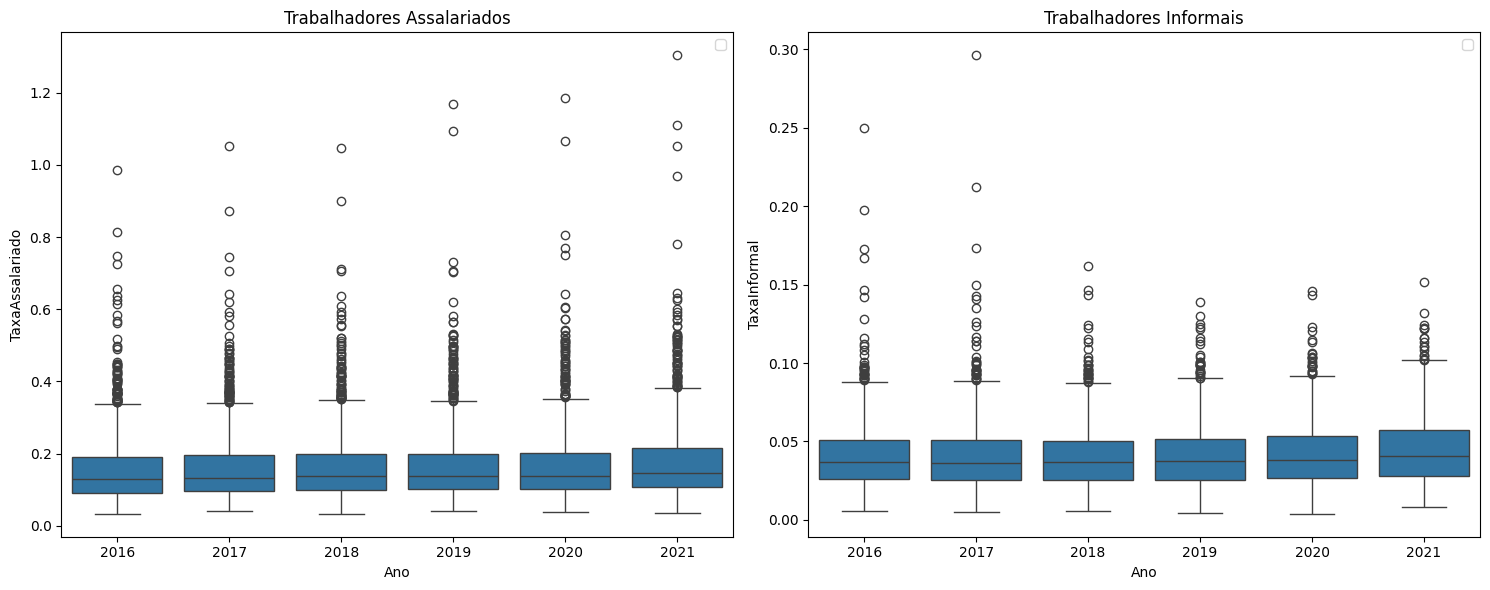

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) 

sns.boxplot(data =df_sul, x = 'Ano', y = 'TaxaAssalariado', ax = ax1)
ax1.set_title("Trabalhadores Assalariados")
ax1.legend()

sns.boxplot(data =df_sul, x = 'Ano', y = 'TaxaInformal', ax = ax2)
ax2.set_title("Trabalhadores Informais")
ax2.legend()

plt.tight_layout()
plt.show()

## Conclusões

Há principio, não é possível ainda responder a pergunta, mas temos algumas observações interessantes, a primeira é que há uma tendência do aumento da informalidade, observada principalmente na região Norte, outra coisa já discutida anteriormente é a existência de dados que fora coletados incorretamente no dataset. Há uma quantidade muito grande de outliers, e eles estão sempre acima do limite superior, talvez isso seja um sintoma da desigualdade no país... poucos municipios com baixo desemprego, enquanto a maioria tem um desemprego médio/alto.

## Próximos Passos

Uma das maneiras em que essa analise pode ser expandida é com a analise do PIB, no entanto, não temos o PIB de 2021 no dataset, por que ele não estava diponível no momento...

Outra coisa que pode ser feita é expandir a pergunta, e ver como a pandemia afetou o municipio em vários aspectos, uma opção interessante seria olhar a transferência de capital, esse dado é a quantidade de dinheiro que a União repassa para os municipios, com a pandemia, esse repasse aumentou... ver quais cidades receberam mais recursos da união e como isso afetou o PIB, desemprego, e as exportações/importações da cidade durante a pandemia renderia muito mais conclusões do que só analisar as taxas de emprego

No entanto há alguns desafios no estudo dos dados da pandemia, o primeiro deles é que os nossos dados são agregados anualmente o que pode vim a mascarar variações mensais críticas, outra questão é que cada municipio teve autônomia em como lidava com a crise, o que torna a comparação entre municipios da mesma região mais dificil

E por último, como evidênciado na pergunta 9, o Brasil estava se recuperando de uma recessão que ocorreu entre os anos de 2014 e 2016, logo não há no dataset um período de 'normalidade' que possa ser usado como comparação.
